In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import requests
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import os

In [7]:
# Asignamos el path relativo a la variable dir para utilizarla a la hora de consumir los datasets
# Obtener el path actual
dir = os.getcwd()

In [8]:
df_pbi = pd.read_csv(dir+'/datasets/producto_interno_bruto_precios_corrientes_valores_trimestrales_base_2004.csv')

In [9]:
df_pbi.head()

,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,Año,Trimestre
0,4.243558e+07,92319.916536,12146.771411,2014,1
1,4.255238e+07,110513.908086,13715.804367,2014,2
2,4.266950e+07,109809.187328,13232.907304,2014,3
3,4.278465e+07,117111.259545,13756.949964,2014,4
4,4.290011e+07,118710.505888,13663.515580,2015,1


In [ ]:
df_pbi['indice_tiempo'] = pd.to_datetime(df_pbi['indice_tiempo'],format='%Y-%m-%d')
df_pbi['Año'] = df_pbi['indice_tiempo'].dt.year
df_pbi['Trimestre'] = df_pbi['indice_tiempo'].dt.quarter

In [ ]:
drop_col = ['indice_tiempo','pib_precios_corrientes','pib_precios_2004','tcn_pesos_dolares','pib_dolares_precios_corrientes','indice_precios_constantes']
df_pbi.drop(columns=drop_col, inplace=True)

In [12]:
df_pbi = df_pbi[df_pbi['Año'] >= 2014]

In [13]:
df_pbi.head()

,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,Año,Trimestre
0,4.243558e+07,92319.916536,12146.771411,2014,1
1,4.255238e+07,110513.908086,13715.804367,2014,2
2,4.266950e+07,109809.187328,13232.907304,2014,3
3,4.278465e+07,117111.259545,13756.949964,2014,4
4,4.290011e+07,118710.505888,13663.515580,2015,1


In [14]:
df_pbi.to_csv(dir+'/datasets/producto_interno_bruto_precios_corrientes_valores_trimestrales_base_2004.csv',index=False)

In [15]:
def graph_pbi_dolares(df):
    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Crear el eje x con los trimestres del año
    eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(df['Año'], df['Trimestre'])]

    # Crear el eje y con los accesos por cada 100 hab
    eje_y = df['pib_per_capita_dolares_corrientes']

    # Dibujar la línea
    ax.plot(eje_x, eje_y)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Variación del PBI per cápita en dólares por trimestre en Argentina')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('PBI per cápita en dólares')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

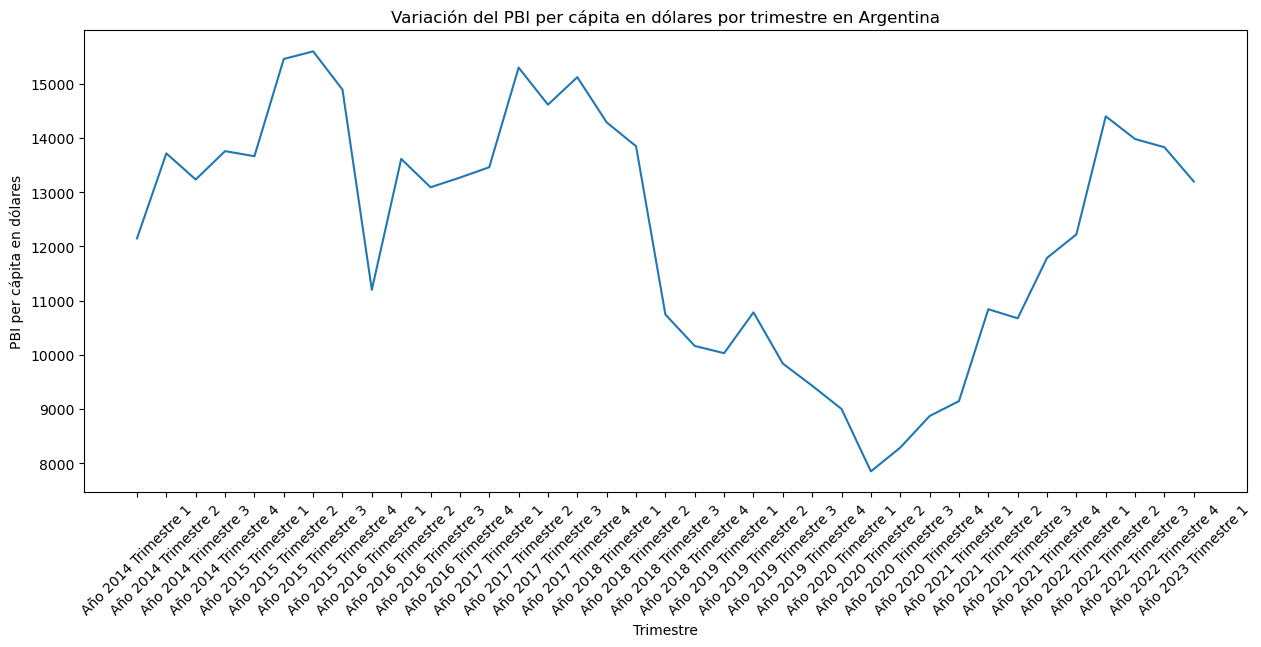

In [16]:
graph_pbi_dolares(df_pbi)

In [17]:
def graph_pbi_pesos(df):
    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Crear el eje x con los trimestres del año
    eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(df['Año'], df['Trimestre'])]

    # Crear el eje y con los accesos por cada 100 hab
    eje_y = df['pib_per_capita_pesos_corrientes']

    # Dibujar la línea
    ax.plot(eje_x, eje_y)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Variación del PBI per cápita en pesos por trimestre en Argentina')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('PBI per cápita en pesos')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

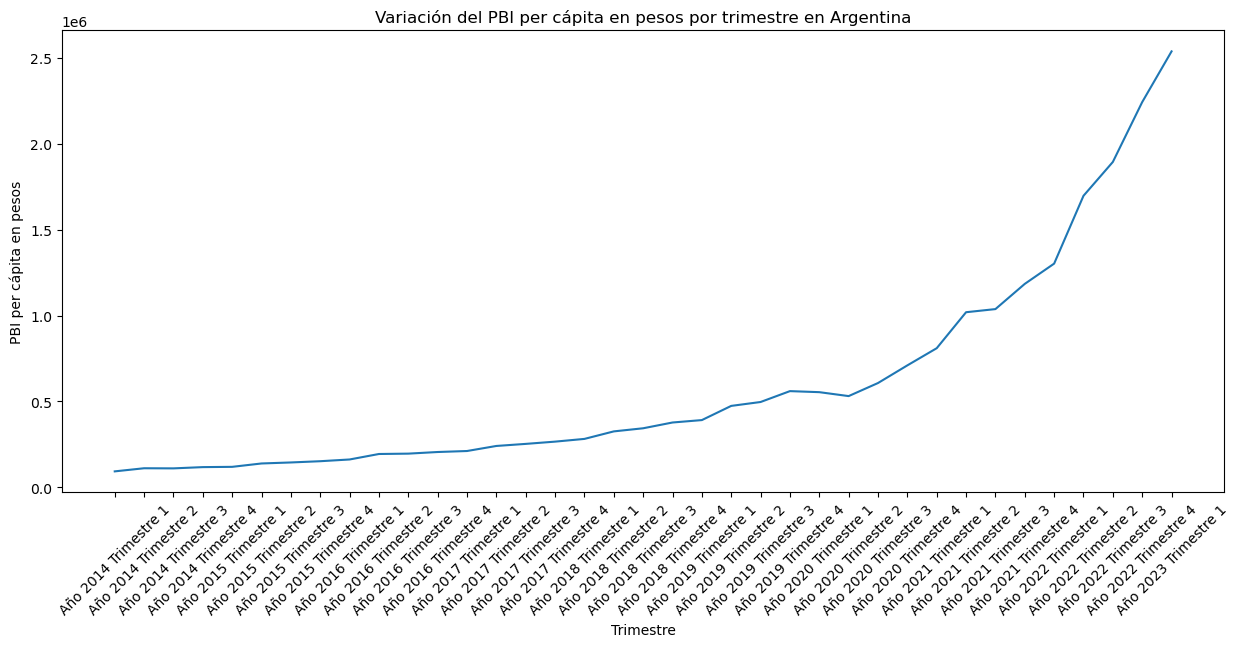

In [18]:
graph_pbi_pesos(df_pbi)

In [19]:
Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia = pd.read_csv(dir+'\datasets\Internet\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv')
Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31.591,30.056,313.382,321.756,290.127,161.183,3.381.049,26.280,4.555.424
1,2022,1,Capital Federal,527.000,5.575,39.918,77.390,61.053,43.289,1.188.072,1.717,1.417.541
2,2022,1,Catamarca,71.000,456.000,4.386,7.009,8.773,3.761,35.715,2.207,62.378
3,2022,1,Chaco,461.000,1.099,16.888,21.235,20.898,13.012,62.946,7.580,144.119
4,2022,1,Chubut,113.000,1.677,61.369,31.856,33.080,13.871,14.055,15.607,171.628


In [20]:
def graph_progress_access(df):

    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Iterar sobre las provincias únicas en el DataFrame
    provincias = df['Provincia'].unique()

    for provincia in provincias:
        # Filtrar el DataFrame por provincia
        provincia_df = df[df['Provincia'] == provincia]
        
        # Crear una etiqueta para la línea
        etiqueta = provincia
        
        # Crear el eje x con los trimestres del año
        eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(provincia_df['Año'], provincia_df['Trimestre'])]
        
        # Crear el eje y con los accesos por cada 100 hab
        eje_y = provincia_df['Accesos por cada 100 hab']
        
        # Dibujar la línea
        ax.plot(eje_x, eje_y, label=etiqueta)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Progreso de accesos a banda ancha por cada 100 habitantes por provincia')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Accesos por cada 100 hab')

    # Colocar la leyenda fuera del gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()



KeyError: 'Accesos por cada 100 hab'

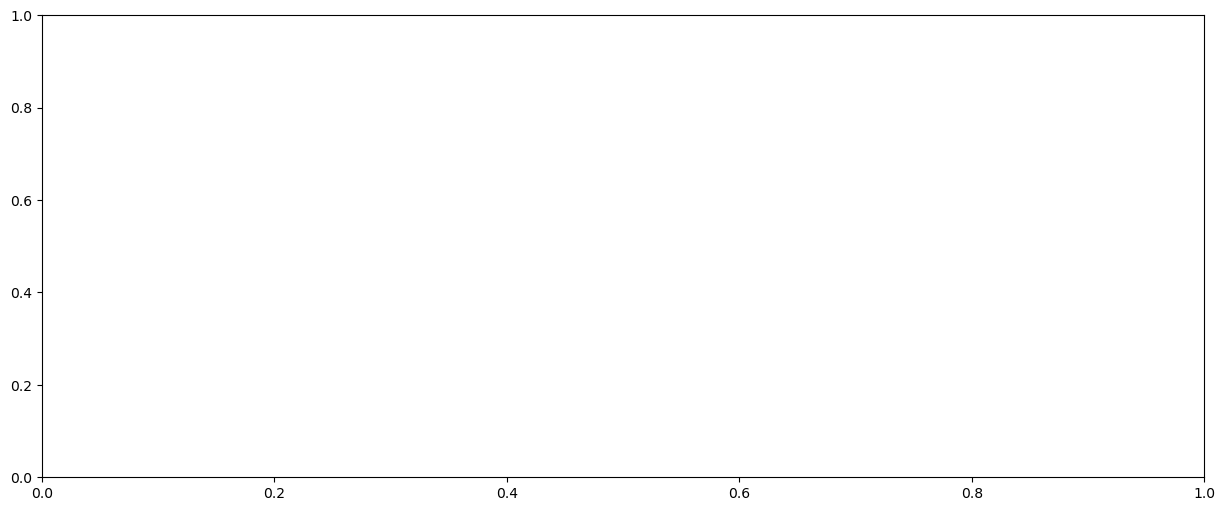

In [21]:
graph_progress_access(Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia)

In [22]:
Accesos_banda_ancha_y_angosta_por_provincia = pd.read_csv(dir+'\datasets\Internet\Accesos_banda_ancha_y_angosta_por_provincia.csv')
Accesos_banda_ancha_y_angosta_por_provincia.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,1,Buenos Aires,4.549.131,6.293,4.555.424
1,2022,1,Capital Federal,1.415.378,2.163,1.417.541
2,2022,1,Catamarca,62.377,1,62.378
3,2022,1,Chaco,144.114,5,144.119
4,2022,1,Chubut,170.701,927,171.628


In [ ]:
def graph_progress_access_ancha_angosta(df):

    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Iterar sobre las provincias únicas en el DataFrame
    provincias = df['Provincia'].unique()

    for provincia in provincias:
        # Filtrar el DataFrame por provincia
        provincia_df = df[df['Provincia'] == provincia]
        
        # Crear una etiqueta para la línea
        etiqueta = provincia
        
        # Crear el eje x con los trimestres del año
        eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(provincia_df['Año'], provincia_df['Trimestre'])]
        
        # Crear el eje y con los accesos por cada 100 hab
        eje_y = provincia_df['Total']
        
        # Dibujar la línea
        ax.plot(eje_x, eje_y, label=etiqueta)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Progreso de accesos a banda angosta por cada 100 habitantes por provincia')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cantidad de habitantes')

    # Colocar la leyenda fuera del gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()


In [ ]:
graph_progress_access_ancha_angosta(Accesos_Internet_fijo_por_tecnologia_y_localidad)

NameError: name 'Accesos_Internet_fijo_por_tecnologia_y_localidad' is not defined

In [23]:
Accesos_Internet_fijo_por_tecnologia_y_localidad = pd.read_csv(dir+'\datasets\Internet\Accesos_Internet_fijo_por_tecnologia_y_localidad.csv')
Accesos_Internet_fijo_por_tecnologia_y_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,914,4.704,- 0,5,- 0,975,- 0,664,7.262,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,- 0,18,- 0,- 0,327,1.127,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [24]:
Accesos_Internet_fijo_por_velocidad_bajada_y_localidad = pd.read_csv(dir+'\datasets\Internet\Accesos_Internet_fijo_por_velocidad_bajada_y_localidad.csv')
Accesos_Internet_fijo_por_velocidad_bajada_y_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,75 Mbps,78 Mbps,80 Mbps,82 Mbps,83 Mbps,85 Mbps,90 Mbps,92 Mbps,95 Mbps,100 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Conectividad_al_servicio_Internet = pd.read_csv(dir+'\datasets\Internet\Conectividad_al_servicio_Internet.csv')
Conectividad_al_servicio_Internet.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,SI,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,SI,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,--,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


In [26]:
Distribucion_accesos_totales_nacionales_internet_fijo_por_velocidad = pd.read_csv(dir+'\datasets\Internet\Distribucion_accesos_totales_nacionales_internet_fijo_por_velocidad.csv')
Distribucion_accesos_totales_nacionales_internet_fijo_por_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
1,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
2,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN
3,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084,NaN
4,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972,NaN


In [27]:
Ingresos_trimestrales_prestacion_servicio_Internet_fijo = pd.read_csv(dir+'\datasets\Internet\Ingresos_trimestrales_prestacion_servicio_Internet_fijo.csv')
Ingresos_trimestrales_prestacion_servicio_Internet_fijo.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51.432.896,Ene-Mar 2022
1,2021,4,45.467.887,Oct-Dic 2021
2,2021,3,42.999.944,Jul-Sept 2021
3,2021,2,38.239.667,Abr-Jun 2021
4,2021,1,36.676.371,Ene-Mar 2021


In [28]:
Listado_localidades_conectividad_internet = pd.read_csv(dir+'\datasets\Internet\Listado_localidades_conectividad_internet.csv')
Listado_localidades_conectividad_internet.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,SI,SI,--,SI,SI,SI,SI,SI,SI
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,--,--,--,--,--,--,SI,--,--
2,BUENOS AIRES,25 de Mayo,Del Valle,SI,--,--,--,SI,SI,--,--,SI
3,BUENOS AIRES,25 de Mayo,Ernestina,SI,--,--,--,--,--,--,--,--
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,--,--,--,--,--,--,--,SI,--


In [29]:
Penetracion_de_Internet_fijo = pd.read_csv(dir+'\datasets\Internet\Penetracion_de_Internet_fijo.csv')
Penetracion_de_Internet_fijo.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"
3,2022,1,Chaco,"44,06"
4,2022,1,Chubut,"88,05"


In [30]:
Penetracion_por_hogares_nacional_Internet_fijo = pd.read_csv(dir+'\datasets\Internet\Penetracion_por_hogares_nacional_Internet_fijo.csv')
Penetracion_por_hogares_nacional_Internet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,1,"73,88","23,05",Ene-Mar 2022
1,2021,4,"73,18","22,81",Oct-Dic 2021
2,2021,3,"70,58","21,98",Jul-Sept 2021
3,2021,2,"69,24","21,55",Abr-Jun 2021
4,2021,1,"67,95","21,13",Ene-Mar 2021


In [31]:
Serie_trimestral_accesos_Internet_fijo_por_tecnologia = pd.read_csv(dir+'\datasets\Internet\Serie_trimestral_accesos_Internet_fijo_por_tecnologia.csv')
Serie_trimestral_accesos_Internet_fijo_por_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
1,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
2,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
3,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021
4,2021,1,2.175.211,5.424.782,1.362.976,434.548,250.455,9.647.972,Ene-Mar 2021


In [32]:
Total_nacional_accesos_Internet_banda_ancha_y_banda_angosta = pd.read_csv(dir+'\datasets\Internet\Total_nacional_accesos_Internet_banda_ancha_y_banda_angosta.csv')
Total_nacional_accesos_Internet_banda_ancha_y_banda_angosta.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
1,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
2,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
3,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
4,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021


In [33]:
Velocidad_media_bajada_Internet_fijo_por_provincia = pd.read_csv(dir+'\datasets\Internet\Velocidad_media_bajada_Internet_fijo_por_provincia.csv')
Velocidad_media_bajada_Internet_fijo_por_provincia.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,1,Buenos Aires,63
1,2022,1,Capital Federal,88
2,2022,1,Catamarca,51
3,2022,1,Chaco,46
4,2022,1,Chubut,13


In [34]:
Velocidad_Media_de_bajada_Internet_fijo = pd.read_csv(dir+'\datasets\Internet\Velocidad_Media_de_bajada_Internet_fijo.csv')
Velocidad_Media_de_bajada_Internet_fijo.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,"55,11",Ene-Mar 2022
1,2021,4,"52,34",Oct-Dic 2021
2,2021,3,"48,46",Jul-Sept 2021
3,2021,2,"45,63",Abr-Jun 2021
4,2021,1,"43,11",Ene-Mar 2021


In [67]:
merged_dataset = pd.merge(df_pbi, Penetracion_por_hogares_nacional_Internet_fijo, on=['Año','Trimestre'])

In [68]:
merged_dataset.head()



,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,4.243558e+07,92319.916536,12146.771411,2014,1,"49,55","15,05",Ene-Mar 2014
1,4.255238e+07,110513.908086,13715.804367,2014,2,"49,86","15,16",Abr-Jun 2014
2,4.266950e+07,109809.187328,13232.907304,2014,3,"50,67","15,43",Jul-Sept 2014
3,4.278465e+07,117111.259545,13756.949964,2014,4,"50,5","15,39",Oct-Dic 2014
4,4.290011e+07,118710.505888,13663.515580,2015,1,"51,36","15,68",Ene-Mar 2015


In [69]:
merged_dataset.drop('Periodo',axis=1, inplace=True)

In [70]:
merged_dataset.head()

,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,4.243558e+07,92319.916536,12146.771411,2014,1,"49,55","15,05"
1,4.255238e+07,110513.908086,13715.804367,2014,2,"49,86","15,16"
2,4.266950e+07,109809.187328,13232.907304,2014,3,"50,67","15,43"
3,4.278465e+07,117111.259545,13756.949964,2014,4,"50,5","15,39"
4,4.290011e+07,118710.505888,13663.515580,2015,1,"51,36","15,68"


In [71]:
# Crear una nueva columna llamada 'Fecha' que combina 'Año' y 'Trimestre'
merged_dataset['Fecha'] = pd.to_datetime(merged_dataset['Año'].astype(str) + '-' + (merged_dataset['Trimestre'] * 3).astype(str) + '-01')

# Formatear la columna 'Fecha' al formato 'yyyy-mm-dd'
merged_dataset['Fecha'] = merged_dataset['Fecha'].dt.strftime('%Y-%m-%d')

In [72]:
merged_dataset.drop(['Año','Trimestre'],axis=1, inplace=True)

In [73]:
merged_dataset.tail()

,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,Accesos por cada 100 hogares,Accesos por cada 100 hab,Fecha
28,4.559224e+07,8.096174e+05,9143.124956,"67,95","21,13",2021-03-01
29,4.570037e+07,1.019189e+06,10839.083775,"69,24","21,55",2021-06-01
30,4.580875e+07,1.037375e+06,10671.175018,"70,58","21,98",2021-09-01
31,4.591490e+07,1.184245e+06,11786.419125,"73,18","22,81",2021-12-01
32,4.602130e+07,1.302272e+06,12220.639513,"73,88","23,05",2022-03-01


In [74]:
type(merged_dataset['Accesos por cada 100 hab'][1])

str

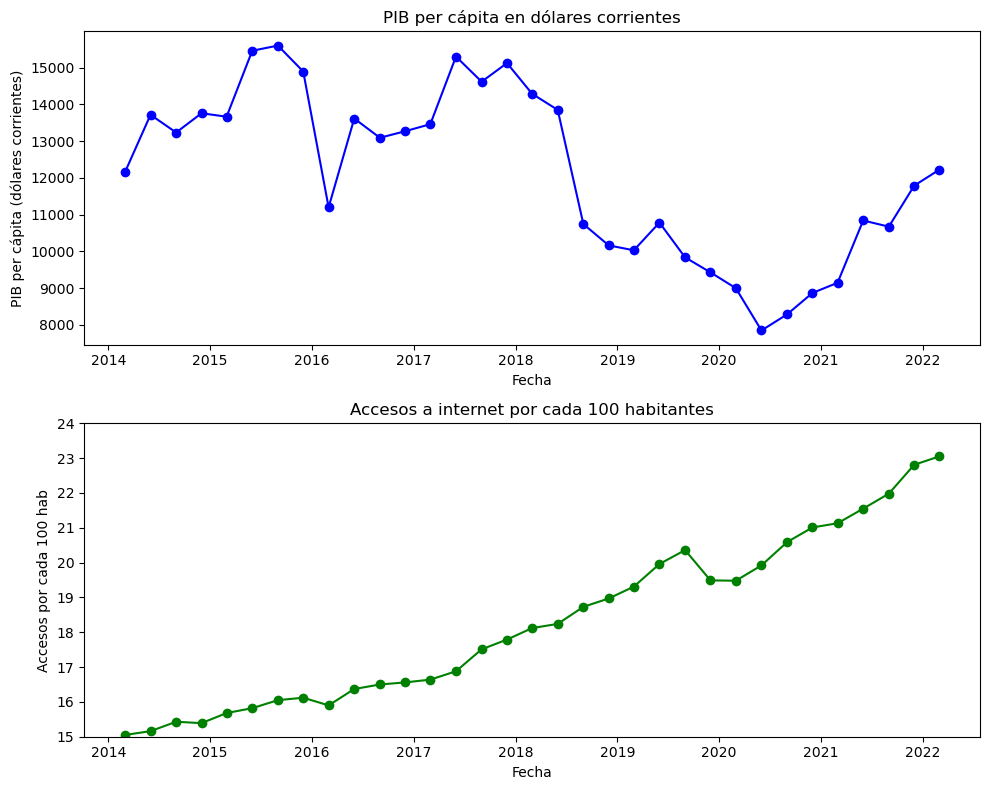

In [76]:
# Convertir la columna 'Fecha' al formato de fecha
merged_dataset['Fecha'] = pd.to_datetime(merged_dataset['Fecha'])


# Convertir la columna 'Accesos por cada 100 hab' a tipo float
merged_dataset['Accesos por cada 100 hab'] = merged_dataset['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)


# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))



# Gráfico 1: pib_per_capita_dolares_corrientes
ax1.plot(merged_dataset['Fecha'], merged_dataset['pib_per_capita_dolares_corrientes'], marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('PIB per cápita (dólares corrientes)')
ax1.set_title('PIB per cápita en dólares corrientes')

# Gráfico 2: Accesos por cada 100 hab
ax2.plot(merged_dataset['Fecha'], merged_dataset['Accesos por cada 100 hab'], marker='o', linestyle='-', color='green')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Accesos por cada 100 hab')
ax2.set_title('Accesos a internet por cada 100 habitantes')
ax2.set_ylim(15, 24)  # Establecer el rango del eje y entre 15 y 24

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()